In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'

In [3]:
if __name__ == "__main__":
    path = '../8.Regression/iris.data'  # 数据文件路径
    data = pd.read_csv(path, header=None)
    x, y = data[range(4)], data[4]
    y = pd.Categorical(y).codes
    x = x[[0, 1]]
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, train_size=0.6)

In [4]:
    # 分类器
    clf = svm.SVC(C=0.1, kernel='linear', decision_function_shape='ovr')
    # clf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
    clf.fit(x_train, y_train.ravel())

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
    # 准确率
    print clf.score(x_train, y_train)  # 精度
    print '训练集准确率：', accuracy_score(y_train, clf.predict(x_train))
    print clf.score(x_test, y_test)
    print '测试集准确率：', accuracy_score(y_test, clf.predict(x_test))

0.8
训练集准确率： 0.8
0.8
测试集准确率： 0.8


In [6]:
    # decision_function
    print 'decision_function:\n', clf.decision_function(x_train)
    print '\npredict:\n', clf.predict(x_train)

decision_function:
[[ 2.22976777  0.93523902 -0.16500679]
 [-0.12204492  2.11891317  1.00313176]
 [-0.23499985  1.11410221  2.12089764]
 [ 2.16897433  0.99886921 -0.16784355]
 [ 2.22326299  0.96255343 -0.18581642]
 [-0.23718865  1.07538094  2.16180772]
 [ 2.27755165  0.92623764 -0.20378929]
 [-0.14162089  1.05737818  2.08424271]
 [-0.20679194  1.04356584  2.1632261 ]
 [-0.26977418  1.06847477  2.20129941]
 [-0.07644985  2.07119052  1.00525933]
 [-0.23937746  1.03665967  2.20271779]
 [-0.11772895  1.05287749  2.06485146]
 [ 2.21888538 -0.11488911  0.89600373]
 [-0.23931582  2.18013788  1.05917794]
 [-0.22849507  1.0867878   2.14170727]
 [-0.23718865  1.07538094  2.16180772]
 [ 1.01480194  2.11922344 -0.13402538]
 [-0.1438097   1.01865691  2.12515278]
 [-0.07426104  2.10991179  0.96434926]
 [ 2.1320112  -0.08547949  0.95346829]
 [ 2.16028075  0.98746236 -0.14774311]
 [ 2.24058852 -0.15811106  0.91752255]
 [-0.23937746  1.03665967  2.20271779]
 [ 2.26454209  0.98086646 -0.24540855]
 [-0.1

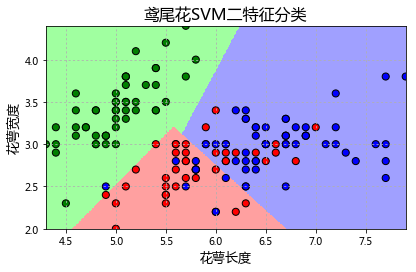

In [7]:
    # 画图
    x1_min, x2_min = x.min()
    x1_max, x2_max = x.max()
    x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]  # 生成网格采样点
    grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
    # print 'grid_test = \n', grid_test
    # Z = clf.decision_function(grid_test)    # 样本到决策面的距离
    # print Z
    grid_hat = clf.predict(grid_test)       # 预测分类值
    grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同
    # mpl.rcParams['font.sans-serif'] = [u'SimHei']
    # mpl.rcParams['axes.unicode_minus'] = False

    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    plt.figure(facecolor='w')
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
    plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)      # 样本
    plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)     # 圈中测试集样本
    plt.xlabel(iris_feature[0], fontsize=13)
    plt.ylabel(iris_feature[1], fontsize=13)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title(u'鸢尾花SVM二特征分类', fontsize=16)
    plt.grid(b=True, ls=':')
    plt.tight_layout(pad=1.5)
    plt.show()